# Some important (high-level) considerations

In applying any machine learning algorithms to a dataset, several considerations are crucial.  This supplementary document covers some of the basic steps in making choices that matter to your problem.



## Problem types *or* Goals

```{figure} ../img/ml-goals1.png
---
width: 70%
name: ml-goals1
---
Goals in building a model (image source: Stefano Tempesta).
```

```{figure} ../img/ml-goals2.png
---
width: 70%
name: ml-goals2
---
Goals in building a model, continued (image source: Stefano Tempesta).
```

## Learning algorithms

### Supervised learning
To model relationships and dependencies between input and output.

**Regression**

For example, can we predict the mass of a penguin given its other characteristics?

In [1]:
import seaborn as sns
import pandas as pd
sns.set_palette('bright')

penguins = sns.load_dataset('penguins')
penguins = penguins[~penguins.isna().any(axis='columns')]
penguins = penguins.sort_values('flipper_length_mm')

In [7]:
import sklearn
sklearn.__version__

'1.4.0'

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import root_mean_squared_error
import numpy as np

def root_mean_squared_error(y_true, y_test):
    return np.sqrt(np.mean((y_true - y_test)**2))

X = penguins[['flipper_length_mm']]
y = penguins['body_mass_g']

# Linear Regression
lr = LinearRegression()
lr.fit(X, y)
y_pred_lr = lr.predict(X)
print(f"Linear Regression RMSE: {root_mean_squared_error(y, y_pred_lr)}")

# k-Nearest Neighbors
knn = KNeighborsRegressor()
knn.fit(X, y)
y_pred_knn = knn.predict(X)
print(f"kNN RMSE: {root_mean_squared_error(y, y_pred_knn)}")

# Random Forest
rf = RandomForestRegressor()
rf.fit(X, y)
y_pred_rf = rf.predict(X)
print(f"RF RMSE: {root_mean_squared_error(y, y_pred_rf)}")


Linear Regression RMSE: 392.1602706380618
kNN RMSE: 368.4116952231256
RF RMSE: 345.57584721749686


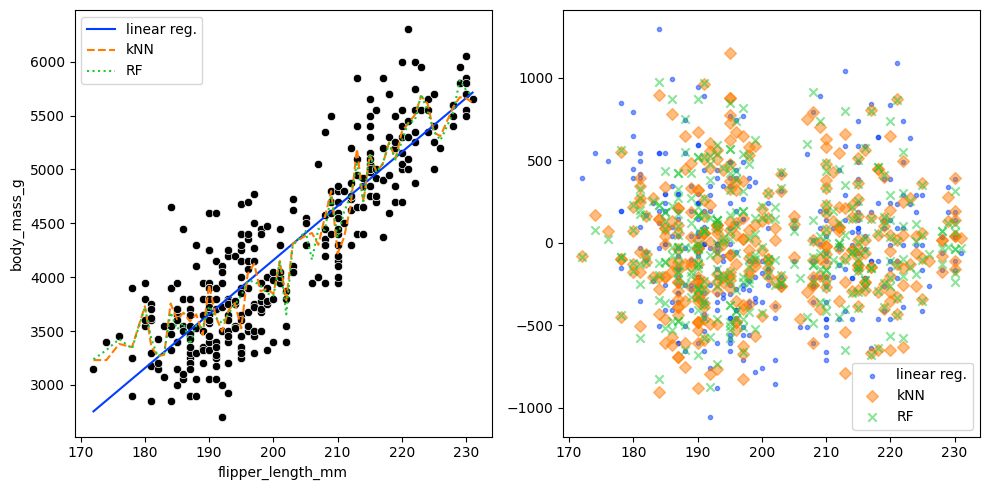

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(y='body_mass_g', x='flipper_length_mm', color='k', data=penguins, ax=ax[0])

y_preds = [y_pred_lr, y_pred_knn, y_pred_rf]
labels = ['linear reg.', 'kNN', 'RF']
linestyles = ['-', '--', ':']
markerstyles = ['.', 'D', 'x']

for j, y_pred in enumerate(y_preds):
    ax[0].plot(X, y_pred, label=labels[j], linestyle=linestyles[j])
    ax[1].scatter(X, y - y_pred, label=labels[j], marker=markerstyles[j], alpha=0.5)
ax[0].legend()
ax[1].legend()
plt.tight_layout()

**Classification**

For example, can we predict where a penguin lives given its other characteristics?

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Define inputs and outputs
penguins = penguins.sample(frac=1)
X = penguins.drop("island", axis=1)
y = penguins["island"]

# Encode categorical variables
enc = LabelEncoder()
y = enc.fit_transform(y)
X = pd.get_dummies(X)

In [ ]:
models = [LogisticRegression, SVC, RandomForestClassifier]

C:\Users\moses\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\moses\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

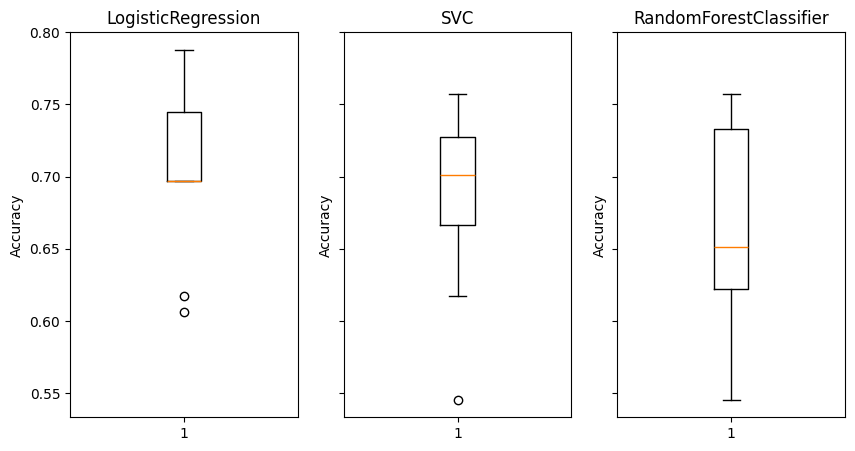

In [19]:
models = [LogisticRegression, SVC, RandomForestClassifier]

fig, ax = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
for j, model in enumerate(models):
    m = model()  # e.g. LogisticRegression()
    # m.fit(X, y)
    # y_pred = m.predict(X)
    # print(f"{type(m).__name__}: {accuracy_score(y, y_pred)}")
    cvs = cross_val_score(m, X, y, cv=10)
    ax[j].boxplot(cvs)
    ax[j].set_title(type(m).__name__)
    ax[j].set_ylabel('Accuracy')

### Unsupervised learning
To identify structure or relationships.

**Clustering**

For example, can we group the penguins to identify the species using their characteristics?

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [21]:
# Define input and output
X = penguins.drop(["species", "island", 'sex'], axis=1)
y = penguins["species"]

# Encode categorical variables
enc = LabelEncoder()
y = enc.fit_transform(y)

In [23]:
# clustering fitting and prediction
kmeans = KMeans()
kmeans.fit(X)

y_pred = kmeans.predict(X)

penguins['species_pred'] = y_pred

In [25]:
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [28]:
Xstd = (X - X.mean(0)) / X.std(0)

In [29]:
Xstd

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
299,0.220750,-0.388407,1.572018,2.164566
217,1.025333,0.525653,-0.568429,-0.536573
174,-0.144970,-0.286845,-0.996518,-1.623238
120,-1.424989,0.017842,-0.996518,-1.312762
66,-1.552991,-0.489969,-0.425733,-1.064382
...,...,...,...,...
236,-0.364402,-1.861060,0.644491,-0.070859
278,-0.144970,-1.353248,0.501794,0.301712
255,0.805901,-0.439188,1.357973,1.481520
227,0.495040,-0.946999,1.286625,1.233139


In [32]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Xstd)

y_pred = kmeans.predict(Xstd)

penguins['species_pred'] = y_pred

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

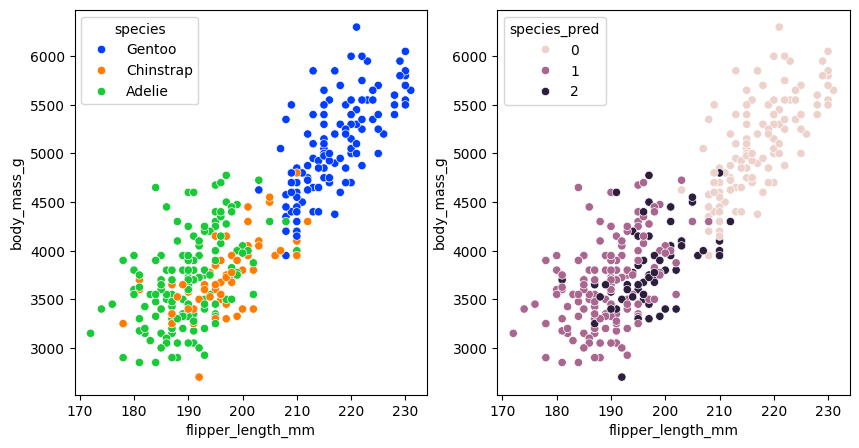

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(y='body_mass_g', x='flipper_length_mm', hue='species', data=penguins, ax=ax[0])
sns.scatterplot(y='body_mass_g', x='flipper_length_mm', hue='species_pred', data=penguins, ax=ax[1])

### Semi-supervised learning
Some outputs are "labeled", most are not, typically in classification problems.

```{figure} ../img/ex-semi-supervised.png
---
width: 80%
name: ex-semi-supervised
---
Example of a semi-supervised learning model {cite:p}`berthelot2019mixmatch`.
```

### Reinforcement learning
The algorithm learns by acting and observing reward.  The goal is to identify an "optimal" policy.

```{figure} ../img/reinforcement-learning.png
---
width: 70%
name: reinforcement
---
Generic modeling of a reinforcement learning model.
```

## Training, testing, and validation

A brief word through https://mlu-explain.github.io/train-test-validation/.

## Regularization and hyperparameter tuning

Example: with a linear regression base.

Lasso ($\ell_1$):

$$\min_{w} { \frac{1}{2n} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$$

Ridge ($\ell_2$):

$$\min_{w} { \frac{1}{2n} ||X w - y||_2 ^ 2 + \alpha ||w||_2 ^ 2}$$
Elastic Net:

$$\min_{w} { \frac{1}{2n} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +
\frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}$$

```{figure} ../img/lasso-ridge.png
---
width: 70%
name: lasso-ridge
---
Lasso vs. ridge regularization {cite:p}`efron2021computer`.
```

In [ ]:
from sklearn.linear_model import lasso_path, enet_path

X = penguins.drop(['body_mass_g'], axis=1)
X = pd.get_dummies(X)

y = penguins['body_mass_g']

In [ ]:
# print("Computing regularization path using the lasso...")
eps = 5e-4
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps)
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8)

In [ ]:
import numpy as np 
from itertools import cycle

plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and Elastic-Net Paths")
plt.legend((l1[-1], l2[-1]), ("Lasso", "Elastic-Net"), loc="lower left")
plt.axis("tight")

In [ ]:
X.columns

In [ ]:
coefs_lasso[:, 99]

## One step toward automating machine learning model selection

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

penguins = sns.load_dataset('penguins')
penguins = penguins[~penguins.isna().any(axis='columns')]

### Regression

### Classification